In [82]:
import numpy as np 
# 定义感知器类 
class Perceptron(object):
    # 定义初始化函数 
    """
    eta: 学习率
    n_iter: 权重向量的训练次数
    w_: 神经分叉权重向量
    errors_: 用于记录神经元判断出错次数， 神经元预测错误数，根据这个数来判断神经元的预测效果
    """
    def __init__(self, eta = 0.01, n_iter=10):
        # 简单初始化 
        self.eta = eta 
        self.n_iter = n_iter
        pass
    # 函数：根据输入的样本进行神经元的培训
    def fit(self, X, y):
        """
        输入训练数据，培训神经元，X输入样本向量，y对应样本分类
        
        X：shape[n_samples, n_features]
        X:[[1,2,3], [4,5,6]]
        n_samples： 2 因为有两个向量
        n_features: 3 因为每个向量有3个电信号
        
        y:[1, -1] 表示分类，前面[1,2,3]就是分类1， 后面[4,5,6]就是分类 -1
        """
        
        # 初始化权重向量为 0 
        """
        W_ 就是权重 
        np.zero： numpy类库函数全部初始化为 0 
        X.shape[1] 就是 n_samples 就是向量个数 
        (1+X.shape[1]) 加一是因为前面算法提到的w0，也就是步调函数阈值
        """
        self.w_ =np.zeros(1 + X.shape[1]);
        self.errors_ = [] # 错误向量作为空的数组
        
        # 进入训练过程
        for _ in range(self.n_iter): # 训练 n_iter 次，如果训练这么多次还不行的话，就终止
            errors = 0 
            """
            X:[1,2,3],[4,5,6]
            y:[1, -1]
            zip(X,y) = [1,2,3, 1], [4,5,6, -1]
            """
            for xi, target in zip(X,y):
                """
                update = η * （y - y') 
                η \eta 是学习率
                """
                update = self.eta * (target - self.predict(xi))
                """
                xi 是向量 
                update 是常量
                update * xi 等价 (ΔW(1) = X[1]*udpate, Δw(2) = X[2]*update, ΔW(3) = X[3]*update)
                [1:] 表示忽略第0个元素，从第1个元素开始
                """
                self.w_[1:] += update * xi
                self.w_[0] += update #阈值更新 w 的第0个元素是阈值 
                
                """
                如果出现错误，统计错误的次数
                错误的次数越来越少，模型的效果就越来越好，数据预测就越来越准确
                """
                errors += int(update != 0.0 )
                # 错误的统计次数放到错误列表中
                self.errors_.append(errors)
                pass
            pass
        # 数据的弱化，把输入数据和权重向量进行点积 
        """
        z= w0*1 + w1*x1 + ... Wn*Xn 
        """
    # 向量的点积    
    def net_input(self, X) :
        """
        z = W0*1 + W1*X1 + W2*X2 + ... Wn*Xn
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    pass

    # 分类预测，大于0就是1，小于0就是-1
    def predict(self, X) :
        return np.where(self.net_input(X) >= 0.0 , 1, -1)
    pass
    pass

In [83]:
file = "./iris.data.csv"
import pandas as pd 
df = pd.read_csv(file, header=None) # 没有标题或文件头
df.head(10) # 显示前10行

# 可视化显示 
import matplotlib.pyplot as plt 
import numpy as np 
y = df.loc[0:100, 4].values # 把0到100行的第4列的数据取出来
# print (y) 
y = np.where(y == 'Iris-setosa', -1, 1) # 把Iris-setosa等字符串转成1或-1
# print (y)
X = df.iloc[0:100, [0,2]].values # 把第0列和第2列的数据抽取出来
# 把x描绘出来 
plt.scatter(X[:50, 0], X[:50,1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('花瓣长度')
plt.ylabel('花茎长度')
plt.legend(loc='upper left')
plt.show()


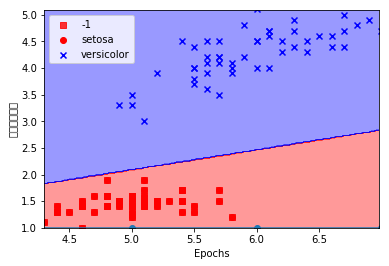

In [84]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('错误分类次数')
plt.show()

In [88]:
from matplotlib.colors import ListedColormap  # 引入相关类库
# 扩展数据得到两个矩阵
def plot_decision_regions(X, y, classifier, resolution=0.02): # 定义函数
    markers=('s', 'x', 'o', 'v') # 数据显示的相关信息
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan') # 数据显示的颜色
    cmap = ListedColormap(colors[:len(np.unique(y))]) # 根据向量y的不同结果显示不同的颜色，向量y的结果是 1或-1，种类为2种，len为2，
    
    """
    X[:,0]是numpy中数组的一种写法，表示对一个二维数组，取该二维数组的所有第一维，第二维中取第0个数据，
    直观来说，X[:,0]就是取所有行的第0个数据, X[:,1] 就是取所有行的第1个数据。
    """                                       
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max() # 获得花瓣长度的最大值和最小值
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max() # 获得花径长度的最大值和最小值
    
    # print(x1_min, x1_max)
    # print(x2_min, x2_max)
    
    # xx1 是根据 x1_min, x1_max, resolution 的向量扩展为一个矩阵，xx2 同理
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    """
    print(np.arange(x1_min, x1_max, resolution).shape)
    print(np.arange(x1_min, x1_max, resolution))
    print(xx1.shape)
    print(xx1)
    print(np.arange(x2_min, x2_max, resolution).shape)
    print(np.arange(x2_min, x2_max, resolution))
    print(xx2.shape)
    print(xx2)
    """
    
    # z存储模型分类后的结果 
    # ravel()把扩展后的多维向量还原为单维向量 
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # print(xx1.ravel())
    # print(xx2.ravel())
    # print(Z)
    
    # 绘制相关信息 
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for inx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(inx),
                   marker=markers[inx], label=cl)
    

In [89]:
plot_decision_regions(X, y, ppn, resolution=0.02)

plt.xlabel('花径长度')
plt.ylabel('花瓣长度')
plt.legend(loc='upper left')
plt.show()

C:\Program Files\Anaconda\lib\site-packages\ipykernel\__main__.py:46: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 100 but corresponding boolean dimension is 101


IndexError: index 100 is out of bounds for axis 0 with size 100